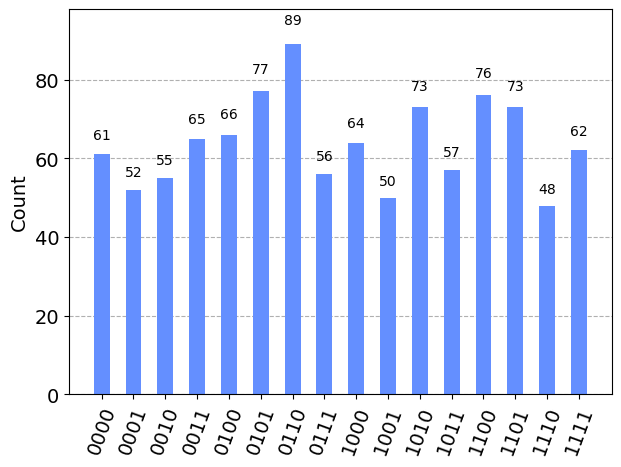

In [23]:
import qiskit
import seaborn

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import extensions as ex

# change matplotlib backend to inline
%matplotlib inline
class Quasi:
    def __init__(self, n, m, s):
        self.n = n
        self.m = m
        self.s = s
        self.q = QuantumRegister(n)
        self.c = ClassicalRegister(n)
        self.qc = QuantumCircuit(self.q, self.c)
        self.qc.h(self.q)
        self.qc.barrier()
        self.qc.measure(self.q, self.c)
        self.qc.barrier()
        self.qc = self._oracle(self.qc)
        self.qc.barrier()
        self.qc.h(self.q)
        self.qc.barrier()
        self.qc.measure(self.q, self.c)

    def _oracle(self, qc):
        qc.h(self.q[self.n - 1])
        qc.mct(self.q[: self.n - 1], self.q[self.n - 1], self.q[self.n :])
        qc.h(self.q[self.n - 1])
        return qc

    def simulate(self):
        backend = Aer.get_backend("qasm_simulator")
        shots = 1024
        results = execute(self.qc, backend=backend, shots=shots).result()
        answer = results.get_counts()
        return answer

    def plot(self, answer):
        return plot_histogram(answer)
        

    def run(self):
        answer = self.simulate()
        return self.plot(answer)


n = 4
m = 4
s = 4
quasi = Quasi(n, m, s)
quasi.run()


